<a href="https://colab.research.google.com/github/EJH22/MSc-TranslationalNeuroscience-Module3/blob/main/MNIST_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torch.nn as nn # this is for neural net functionality
import torch.nn.functional as F #adds some efficiency
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import sklearn
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix #evaluation metric
import matplotlib.pyplot as plt
%matplotlib inline
import time 
torch.manual_seed(101) #for consistent results (normalised??)


In [ ]:
import torchvision.datasets as datasets

In [ ]:
Transform = transforms.ToTensor() #this function allows the data in the mnist dataset to be tranformed to a tensor

In [ ]:
train_MNIST = datasets.MNIST(root='./data' , train=True, download=True,transform=Transform)
test_MNIST = datasets.MNIST(root='./data', train=False, download=True, transform=Transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
print(train_MNIST)
print(test_MNIST)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
train_MNIST[1]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

Shape torch.Size([1, 28, 28]) 
Label: 5


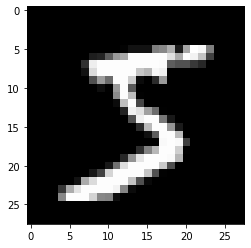

In [ ]:
image, label = train_MNIST[0]
print('Shape', image.shape,'\nLabel:',label)

plt.imshow(image.reshape((28,28)),cmap="gray")

## Multilayer perceptron takes the equation N=Wx+b

In [ ]:
train_loader = DataLoader(train_MNIST, batch_size=100, shuffle=True)
test_loader = DataLoader (test_MNIST, batch_size=100, shuffle = False)

In [ ]:
class MultilayerPerceptron(nn.Module):
  def __init__(self, input_size = 784, output_size=10, layers=[120,84]):
      super().__init__()
      self.d1 = nn.Linear(input_size, layers[0])#hidden layer 1
      self.d2 = nn.Linear(layers[0],layers[1])#hidden layer 2
      self.d3 = nn.Linear(layers[1], output_size)#output layer

  def forward(self,X):
      X = F.relu(self.d1(X))
      X = F.relu(self.d2(X))
      X = self.d3(X)
      return F.log_softmax(X, dim=1)

In [ ]:
model = MultilayerPerceptron()
print(model)

MultilayerPerceptron(
  (d1): Linear(in_features=784, out_features=120, bias=True)
  (d2): Linear(in_features=120, out_features=84, bias=True)
  (d3): Linear(in_features=84, out_features=10, bias=True)
)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
for images, labels in train_loader:
  print('Original shape:', image.size())
  break
print('After flattening:', images.view(100,-1).size())

Original shape: torch.Size([1, 28, 28])
After flattening: torch.Size([100, 784])


In [ ]:
epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct =[]

for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  ##running for training bathes
  for b, (X_train, y_train) in enumerate(train_loader):
      b+=1

   ##training the model

      y_pred = model(X_train.view(100,-1))
      loss = criterion(y_pred,y_train)

    ##Calculate number of correct predictions

      predicted = torch.max(y_pred.data,1)[1]#the prediction that has the maximum probability
      batch_corr = (predicted ==y_train).sum()
      trn_corr+= batch_corr

    ##Update parameters

      optimiser.zero_grad() #reset the gradients after each training set
      loss.backward() #this triggers backpropoagtion
      optimiser.step() #perform parameter update

    #print interim result:
      if b%600==0:
        print(f'epoch: {i:2} batch:{b:4}[{100*b:6}/60000] Train loss:{loss.item():10.8f} Train accuracy: {100*trn_corr.item()/10000:.2f}%')


  ##Update train loss and accuracy or the epoch
train_losses.append(loss)
train_correct.append(trn_corr)

  ##Run the testing batches
with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):

        y_val = model(X_test.view(-1,28*28))#Here the X_test is flattenned

        ##Tally the number of correct predictions
        predicted = torch.max(y_val.data,1)[1]
        tst_corr+= (predicted == y_test).sum()


  ## Update test loss and accuracy for each ephch
loss = criterion(y_val, y_test)
test_losses.append(loss)
test_correct.append(tst_corr)
      

epoch:  0 batch: 600[ 60000/60000] Train loss:0.00149207 Train accuracy: 599.24%
epoch:  1 batch: 600[ 60000/60000] Train loss:0.00003587 Train accuracy: 599.40%
epoch:  2 batch: 600[ 60000/60000] Train loss:0.00064385 Train accuracy: 599.05%
epoch:  3 batch: 600[ 60000/60000] Train loss:0.00006148 Train accuracy: 599.11%
epoch:  4 batch: 600[ 60000/60000] Train loss:0.00042607 Train accuracy: 599.73%
epoch:  5 batch: 600[ 60000/60000] Train loss:0.00002251 Train accuracy: 599.08%
epoch:  6 batch: 600[ 60000/60000] Train loss:0.02603653 Train accuracy: 598.89%
epoch:  7 batch: 600[ 60000/60000] Train loss:0.00006859 Train accuracy: 599.47%
epoch:  8 batch: 600[ 60000/60000] Train loss:0.02306699 Train accuracy: 599.44%
epoch:  9 batch: 600[ 60000/60000] Train loss:0.00050993 Train accuracy: 599.31%


In [ ]:
test_correct

[tensor(9774)]

In [ ]:
print(f'Test accuracy:{test_correct[-1].item()*100/10000:.3f}%')

Test accuracy:97.800%
